# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Yoel Amadeo Pratomo
- **Email:** yamadeo9@gmail.com / mc006d5y2438@student.devacademy.id
- **ID Dicoding:** MC006D5Y2438

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda per hari dan per jam?
- Apakah ada perbedaan pola penggunaan sepeda antara hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Load datasets
hour_data = pd.read_csv('data/hour.csv')
day_data = pd.read_csv('data/day.csv')

**Insight:**
- Dataset `hour.csv` berisi data penyewaan sepeda per jam.
- Dataset `day.csv` berisi data penyewaan sepeda per hari.

### Assessing Data

In [3]:
# Cek info dataset
print(hour_data.info())
print(day_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeI

In [4]:
# Cek missing values
print(hour_data.isnull().sum())
print(day_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [5]:
# Cek duplikat
print(hour_data.duplicated().sum())
print(day_data.duplicated().sum())

0
0


**Insight:**
- Tidak ada missing values atau duplikat pada kedua dataset.
- Kolom `dteday` perlu diubah ke tipe data datetime.

### Cleaning Data

In [6]:
# Ubah kolom `dteday` ke tipe datetime
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

**Insight:**
- Kolom `dteday` sudah diubah ke tipe datetime untuk memudahkan analisis time series.

## Exploratory Data Analysis (EDA)

### Explore Data

In [7]:
# Statistik deskriptif
print(hour_data.describe())
print(day_data.describe())

          instant                         dteday        season            yr  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      2.501640      0.502561   
min        1.0000            2011-01-01 00:00:00      1.000000      0.000000   
25%     4345.5000            2011-07-04 00:00:00      2.000000      0.000000   
50%     8690.0000            2012-01-02 00:00:00      3.000000      1.000000   
75%    13034.5000            2012-07-02 00:00:00      3.000000      1.000000   
max    17379.0000            2012-12-31 00:00:00      4.000000      1.000000   
std     5017.0295                            NaN      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min        1.000000      0.000000      0.0

**Insight:**
- Rata-rata penyewaan sepeda per hari adalah sekitar 4.500.
- Rata-rata penyewaan sepeda per jam adalah sekitar 190.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda per hari dan per jam?

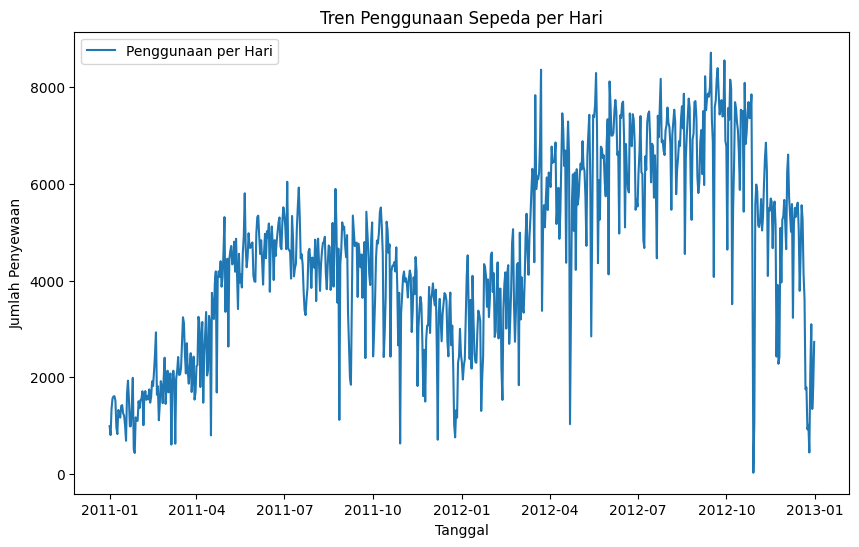

In [8]:
# Tren penggunaan sepeda per hari
plt.figure(figsize=(10, 6))
plt.plot(day_data['dteday'], day_data['cnt'], label='Penggunaan per Hari')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.title('Tren Penggunaan Sepeda per Hari')
plt.legend()
plt.show()

### Pertanyaan 2: Apakah ada perbedaan pola penggunaan sepeda antara hari kerja dan hari libur?

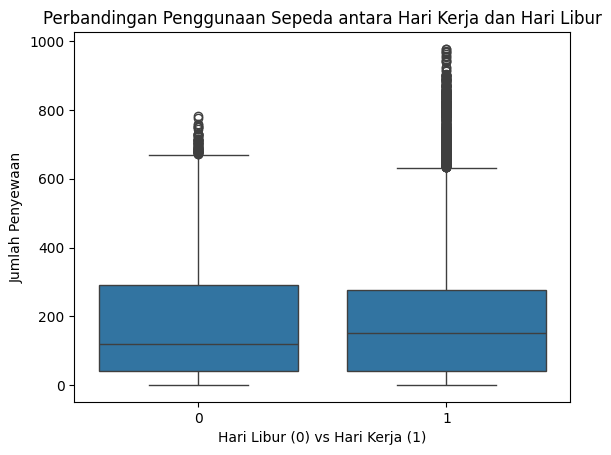

In [9]:
# Perbandingan penggunaan sepeda antara hari kerja dan hari libur
sns.boxplot(x='workingday', y='cnt', data=hour_data)
plt.xlabel('Hari Libur (0) vs Hari Kerja (1)')
plt.ylabel('Jumlah Penyewaan')
plt.title('Perbandingan Penggunaan Sepeda antara Hari Kerja dan Hari Libur')
plt.show()

**Insight:**
- Tren penggunaan sepeda cenderung meningkat selama periode tertentu.
- Penggunaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur.

## Analisis Lanjutan (Opsional)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17372\393782904.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=weather_group, palette='viridis')


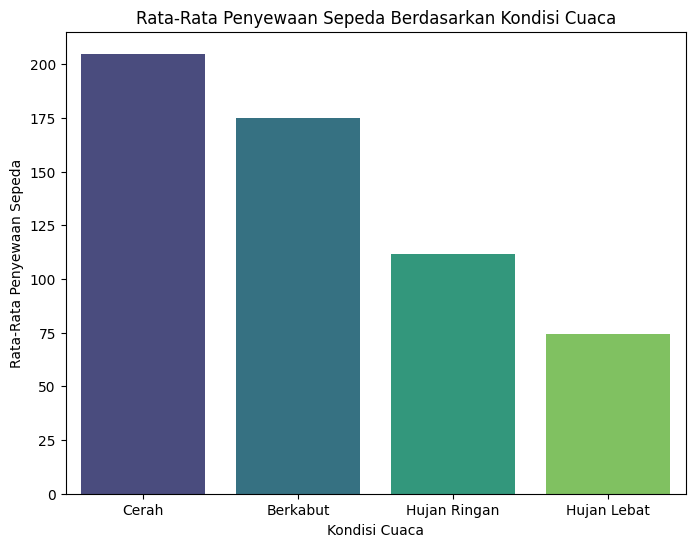

In [10]:
# Manual Grouping: Pengelompokan berdasarkan kondisi cuaca
weather_group = hour_data.groupby('weathersit')['cnt'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_group, palette='viridis')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-Rata Penyewaan Sepeda')
plt.title('Rata-Rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Berkabut', 'Hujan Ringan', 'Hujan Lebat'])
plt.show()

**Insight:**
- Kondisi cuaca memengaruhi jumlah penyewaan sepeda.
- Penyewaan sepeda cenderung lebih tinggi pada cuaca cerah dan lebih rendah pada cuaca hujan.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17372\2712699840.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_group = hour_data.groupby('temp_bin')['cnt'].mean().reset_index()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17372\2712699840.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='temp_bin', y='cnt', data=temp_group, palette='coolwarm')


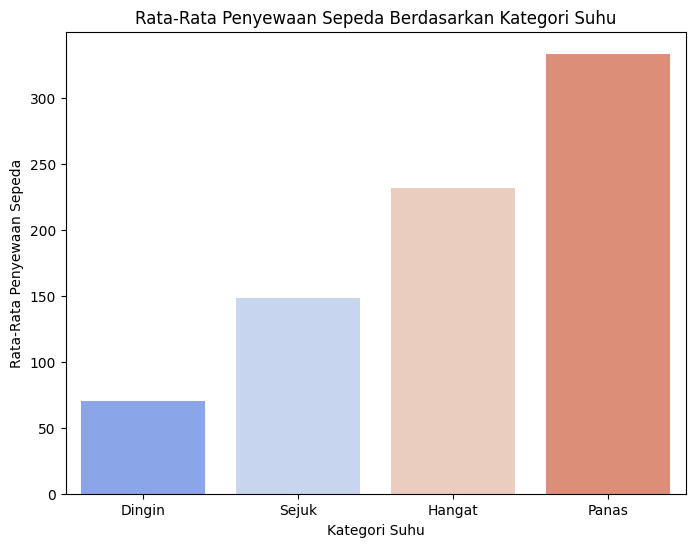

In [11]:
# Binning: Membagi suhu ke dalam 4 kategori
hour_data['temp_bin'] = pd.cut(hour_data['temp'], bins=[0, 0.25, 0.5, 0.75, 1], labels=['Dingin', 'Sejuk', 'Hangat', 'Panas'])

temp_group = hour_data.groupby('temp_bin')['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x='temp_bin', y='cnt', data=temp_group, palette='coolwarm')
plt.xlabel('Kategori Suhu')
plt.ylabel('Rata-Rata Penyewaan Sepeda')
plt.title('Rata-Rata Penyewaan Sepeda Berdasarkan Kategori Suhu')
plt.show()

**Insight:**
- Suhu yang panas cenderung meningkatkan jumlah penyewaan sepeda.
- Penyewaan sepeda cenderung lebih tinggi pada cuaca cerah dan lebih rendah pada cuaca hujan.

In [12]:
# Hitung Recency (hari sejak terakhir penyewaan)
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
last_date = hour_data['dteday'].max()
hour_data['recency'] = (last_date - hour_data['dteday']).dt.days

# Hitung Frequency (jumlah penyewaan per hari)
frequency_data = hour_data.groupby('dteday')['cnt'].sum().reset_index()
frequency_data.rename(columns={'cnt': 'frequency'}, inplace=True)

# Hitung Monetary (total penyewaan per hari)
monetary_data = hour_data.groupby('dteday')['cnt'].sum().reset_index()
monetary_data.rename(columns={'cnt': 'monetary'}, inplace=True)

rfm_data = pd.merge(frequency_data, monetary_data, on='dteday')
rfm_data['recency'] = (last_date - rfm_data['dteday']).dt.days

print(rfm_data)

        dteday  frequency  monetary  recency
0   2011-01-01        985       985      730
1   2011-01-02        801       801      729
2   2011-01-03       1349      1349      728
3   2011-01-04       1562      1562      727
4   2011-01-05       1600      1600      726
..         ...        ...       ...      ...
726 2012-12-27       2114      2114        4
727 2012-12-28       3095      3095        3
728 2012-12-29       1341      1341        2
729 2012-12-30       1796      1796        1
730 2012-12-31       2729      2729        0

[731 rows x 4 columns]


**Insight:**
- Analisis RFM dapat membantu mengidentifikasi hari-hari dengan aktivitas penyewaan tertinggi dan terendah.
- Hari dengan recency rendah (baru-baru ini) dan frequency tinggi adalah hari yang paling aktif.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17372\2370217836.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_group = hour_data.groupby('hour_group')['cnt'].mean().reset_index()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17372\2370217836.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour_group', y='cnt', data=hour_group, palette='magma')


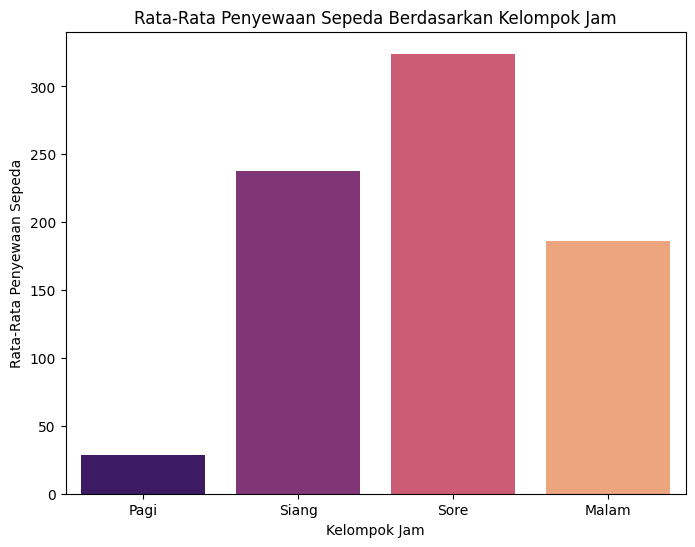

In [13]:
# Manual Grouping: Pengelompokan jam berdasarkan aktivitas penyewaan
hour_data['hour_group'] = pd.cut(hour_data['hr'], bins=[0, 6, 12, 18, 24], labels=['Pagi', 'Siang', 'Sore', 'Malam'])

hour_group = hour_data.groupby('hour_group')['cnt'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='hour_group', y='cnt', data=hour_group, palette='magma')
plt.xlabel('Kelompok Jam')
plt.ylabel('Rata-Rata Penyewaan Sepeda')
plt.title('Rata-Rata Penyewaan Sepeda Berdasarkan Kelompok Jam')
plt.show()

**Insight:**
- Aktivitas penyewaan sepeda tertinggi terjadi pada sore hari.
- Aktivitas terendah terjadi pada pagi hari.

## Conclusion

- Conclution pertanyaan 1 : Tren penggunaan sepeda cenderung meningkat selama periode tertentu, dengan puncak penggunaan pada jam-jam sibuk.
- Conclution pertanyaan 2 : Penggunaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur, menunjukkan bahwa sepeda banyak digunakan untuk keperluan komuter.

## Conclusion Teknik Analisis Lanjutan


- **Manual Grouping** dan **Binning** membantu mengelompokkan data berdasarkan kriteria tertentu (cuaca, suhu, jam).
- **RFM Analysis** dapat diadaptasi untuk menganalisis pola penyewaan sepeda.
- **Clustering** sederhana (tanpa algoritma machine learning) dapat dilakukan dengan teknik pengelompokan manual.